<a href="https://colab.research.google.com/github/artbrgn/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS-Unit-1-Sprint-1-Dealing-With-Data/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 0 - Revert your version of Pandas right from the start
I don't want any of you to get stuck because of Pandas bugs, so right from the get-go revert back to version `0.23.4`
- Run the cell below
- Then restart your runtime. Go to `Runtime`  ->  `Restart runtime...` in the top menu (or click the "RESTART RUNTIME" button that shows up in the output of the cell below).


In [0]:
!pip install pandas==0.23.4

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [1]:
# TODO
# Importing file from machine
import pandas as pd

from google.colab import files
upload = files.upload()

Saving haberman.data to haberman.data


In [22]:
# Headers to be included with df

coloumn_headers = ['age_at_op', 'year_of_op', 'pos_nodes','survival_status']

df = pd.read_csv('haberman.data',names = coloumn_headers)
print(df.shape)
df.head(20)

(306, 4)


,age_at_op,year_of_op,pos_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [20]:
df.shape

(306, 4)

In [21]:
#cheching for NaN values

df.isnull().sum()

age_at_op          0
year_of_op         0
pos_nodes          0
survival_status    0
dtype: int64

In [24]:
#Chaning the 2's to 0's.

df['survival_status'].loc[df['survival_status']==2] = 0
df['survival_status']

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      0
8      0
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     0
25     1
26     1
27     1
28     1
29     1
      ..
276    1
277    1
278    1
279    1
280    1
281    0
282    1
283    1
284    1
285    0
286    0
287    1
288    1
289    1
290    1
291    1
292    1
293    0
294    1
295    1
296    1
297    1
298    1
299    0
300    1
301    1
302    1
303    1
304    0
305    0
Name: survival_status, Length: 306, dtype: int64

In [26]:
df.head()

,age_at_op,year_of_op,pos_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [67]:
df.dtypes

age_at_op          int64
year_of_op         int64
pos_nodes          int64
survival_status    int64
dtype: object

## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [27]:
# TODO
#summary statistics for df

df.describe()

,age_at_op,year_of_op,pos_nodes,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


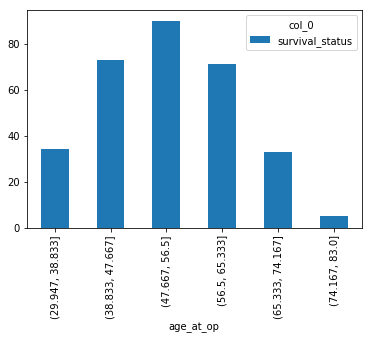

In [58]:
#binning age, year, positive nodes for graphing

bins_age = pd.cut(df['age_at_op'],6)
bins_year = pd.cut(df['year_of_op'],6)
bins_pos = pd.cut(df['pos_nodes'],10)

crosstab = pd.crosstab(bins_age, 'survival_status')
crosstab.plot(kind='bar')

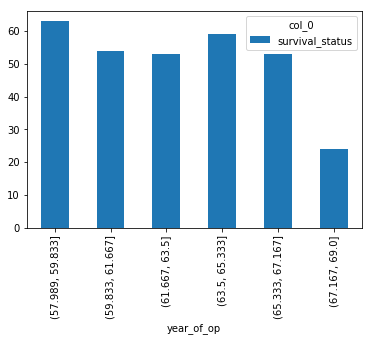

In [59]:
crosstab = pd.crosstab(bins_year, 'survival_status')
crosstab.plot(kind='bar')

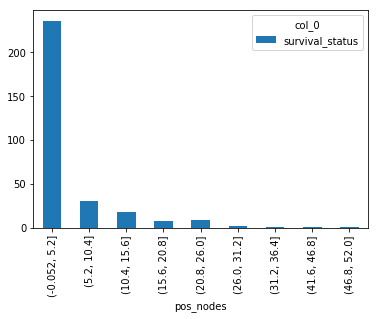

In [55]:
crosstab = pd.crosstab(bins_pos, 'survival_status')
crosstab.plot(kind='bar')

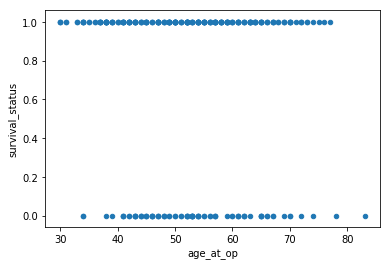

In [35]:
df.plot.scatter('age_at_op','survival_status');

## Part 3 - DataFrame Filtering

Use DataFrame filtering to subset the data into two smaller dataframes. You should make one dataframe for individuals who survived >5 years and a second dataframe for individuals who did not. 

Create a graph with each of the dataframes (can be the same graph type) to show the differences in Age and Number of Positive Axillary Nodes Detected between the two groups.

In [0]:
#convert in to string before applying condition

df['survival_status']=df['survival_status'].astype(str)

In [80]:
# TODO
#seperating df based on condition of 0 or deceased <5 years.

condition_deceased = (df['survival_status'] == 0)
df[condition_deceased].head()

,age_at_op,year_of_op,pos_nodes,survival_status


In [98]:
#making new df based on condition

deceased = df[df['survival_status'].str.contains('0')]
print(deceased.shape)
deceased.head()

(81, 4)


,age_at_op,year_of_op,pos_nodes,survival_status
7,34,59,0,0
8,34,66,9,0
24,38,69,21,0
34,39,66,0,0
43,41,60,23,0


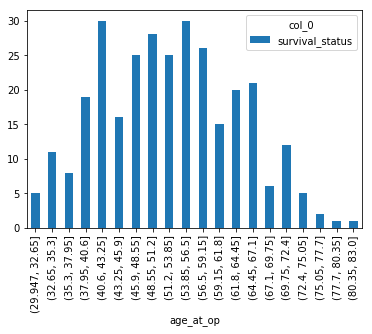

In [115]:
df['survival_status']=df['survival_status'].astype(int)

bin_age = pd.cut(df['age_at_op'],20)
bin_pos = pd.cut(df['pos_nodes'],3)

crosstab = pd.crosstab(bin_age, 'survival_status')
crosstab.plot(kind='bar')

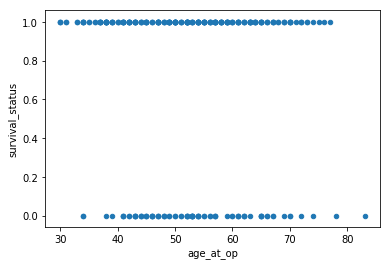

In [105]:
df.plot.scatter('age_at_op','survival_status');

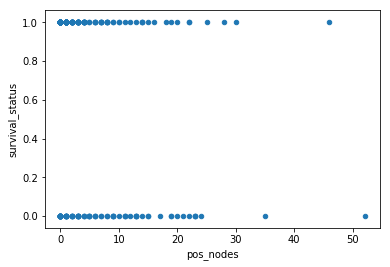

In [106]:
df.plot.scatter('pos_nodes','survival_status');

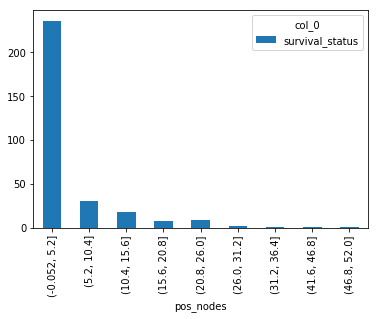

In [91]:
crosstab = pd.crosstab(bins_pos, 'survival_status')
crosstab.plot(kind='bar')

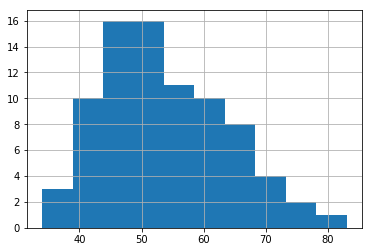

In [87]:
deceased['age_at_op'].hist(bins=10)

In [83]:
#separting df based on condition of survival >5years

condition_survived = (df['survival_status'] == 1)
df[condition_survived].head()

,age_at_op,year_of_op,pos_nodes,survival_status


In [116]:
#saving new df basded on condition
df['survival_status']=df['survival_status'].astype(str)

survived = df[df['survival_status'].str.contains('1')]
print(survived.shape)
survived.head()

(225, 4)


,age_at_op,year_of_op,pos_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


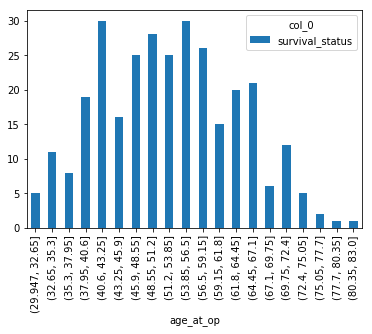

In [117]:
df['survival_status']=df['survival_status'].astype(int)

bin_ages = pd.cut(df['age_at_op'],20)
bin_positive = pd.cut(df['pos_nodes'],6)

crosstab = pd.crosstab(bin_ages, 'survival_status')
crosstab.plot(kind='bar')

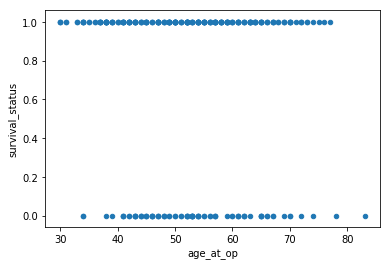

In [109]:
df.plot.scatter('age_at_op','survival_status');

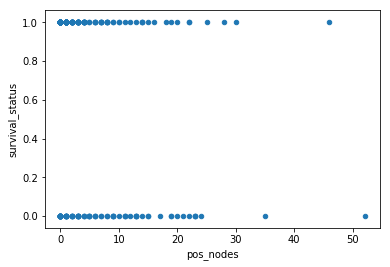

In [110]:
df.plot.scatter('pos_nodes','survival_status');

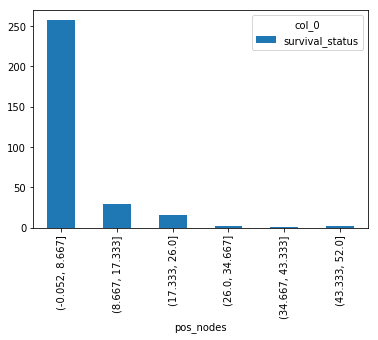

In [101]:
crosstab = pd.crosstab(bin_positive, 'survival_status')
crosstab.plot(kind='bar')

## Part 4 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival? (As that feature goes up in value rate of survival increases)
- What is at least one feature that looks to have a negative relationship with survival? (As that feature goes down in value rate of survival increases)
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

Your Text Answer Here

1) Age looks to have a positive survival up until the mid 50's after which the trend turns negative.

2) Positive nodes looks to have a clear negative affect on survival rate, the higher the positive nodes the less likely the patient will survive.

3)That the older one gets the more likely they are to have more positive notes and after the age of 50 positive nodes would have a higher presence in their system.

In [0]:
# Any Supplemental Code for Analysis Here